In [ ]:
# @title General modules and functions

import numpy as np  # general maths
import matplotlib.pyplot as plt  # for plotting

from copy import deepcopy as copy  # for copying lists of ndarrays

from astropy.io import fits  # for FITS handling
import cv2 as cv  # for general image processing

import os  # handling file directories
from google.colab import drive  # get drive as directory
drive.mount('/content/drive')

# NOTE: fits_data() defined in Lab 2 is superseded by fits.getdata() from astropy.io.fits


# print plot of image and some details
def plot_img(img, title=None):
  print()
  plt.imshow(img, cmap='gray')
  if title != None: plt.title(title)
  plt.show()
  print("Shape:", img.shape)
  print("Type:", img.dtype)
  print("Max =", np.max(img), "   Min =", np.min(img))
  print("Median =", np.median(img), "   Mean =", np.mean(img))
  print()

Mounted at /content/drive


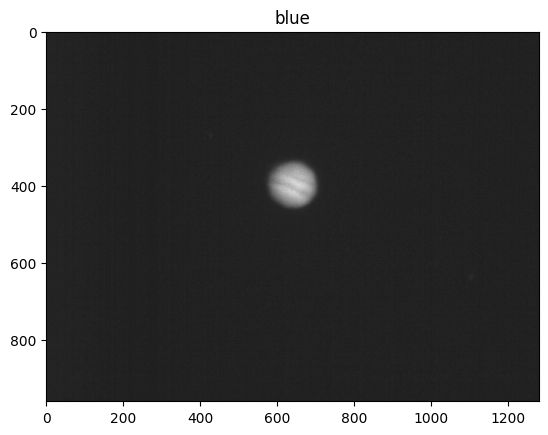

Shape: (960, 1280)
Type: uint16
Max = 5408    Min = 1776
Median = 2256.0    Mean = 2277.224674479167




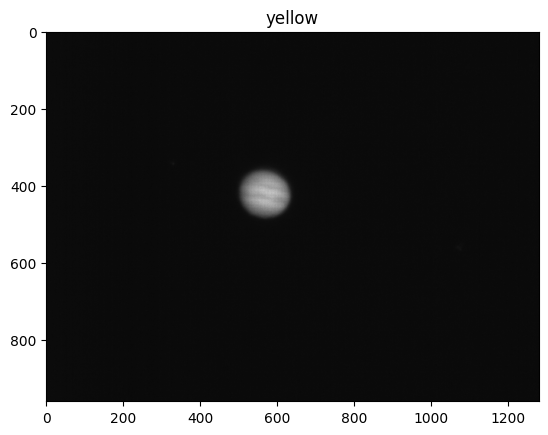

Shape: (960, 1280)
Type: uint16
Max = 12512    Min = 1808
Median = 2256.0    Mean = 2312.755403645833




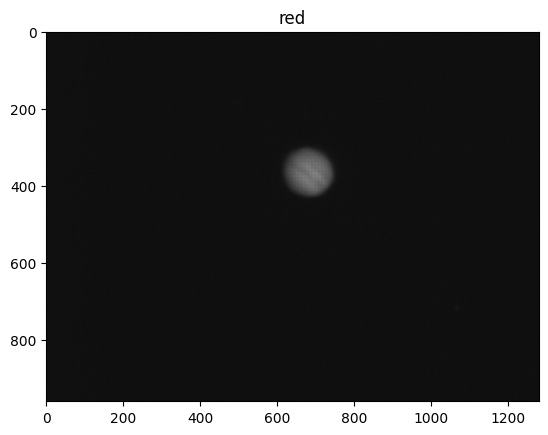

Shape: (960, 1280)
Type: uint16
Max = 12032    Min = 1600
Median = 2256.0    Mean = 2274.8258203125



In [ ]:
# @title Load images

# gets list of files in folder path, from Lab 2
def get_files(folder_path):

  os.chdir(folder_path)  # changes directory

  files = []
  for file_name in os.listdir():  # iterates over each file in directory
    if os.path.isfile(file_name):  # checks if it's a file and not a directory
      files.append(file_name)  # add file to array

  return files


# load blue images
blue_list = get_files("/content/drive/MyDrive/SPS4110 Senior Lab/Lab 3 - Jupiter Photometry/Jupiter Images/Blue Filter")
blue_stack = [fits.getdata(img, ext=0) for img in blue_list]
plot_img(blue_stack[0], "blue")

# load yellow images
yellow_list = get_files("/content/drive/MyDrive/SPS4110 Senior Lab/Lab 3 - Jupiter Photometry/Jupiter Images/Yellow Filter")
yellow_stack = [fits.getdata(img, ext=0) for img in yellow_list]
plot_img(yellow_stack[0], "yellow")

# load red images
red_list = get_files("/content/drive/MyDrive/SPS4110 Senior Lab/Lab 3 - Jupiter Photometry/Jupiter Images/Red Filter")
red_stack = [fits.getdata(img, ext=0) for img in red_list]
plot_img(red_stack[0], "red")

n = len(blue_stack)




First raw image



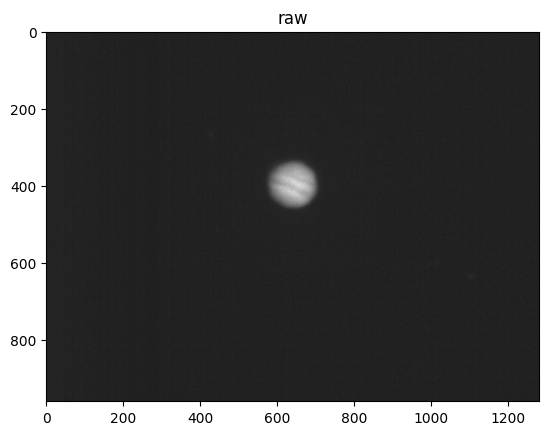

Shape: (960, 1280)
Type: uint16
Max = 5408    Min = 1776
Median = 2256.0    Mean = 2277.224674479167



First calibrated image



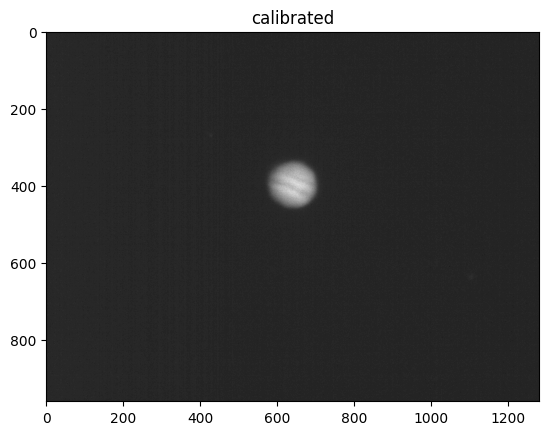

Shape: (960, 1280)
Type: float64
Max = 3097.12    Min = -568.0
Median = -17.12    Mean = -4.191007291666665




First raw image



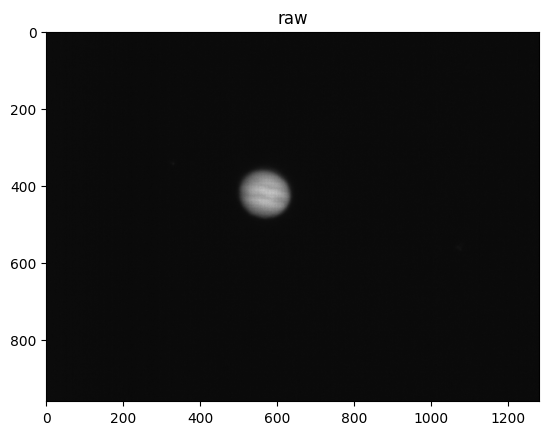

Shape: (960, 1280)
Type: uint16
Max = 12512    Min = 1808
Median = 2256.0    Mean = 2312.755403645833



First calibrated image



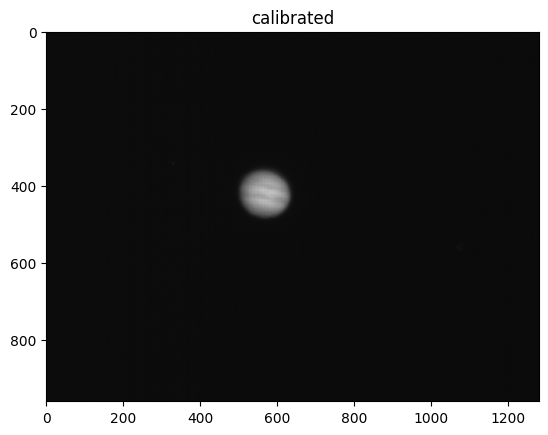

Shape: (960, 1280)
Type: float64
Max = 10200.48    Min = -511.68
Median = -17.28    Mean = 31.33972187499997




First raw image



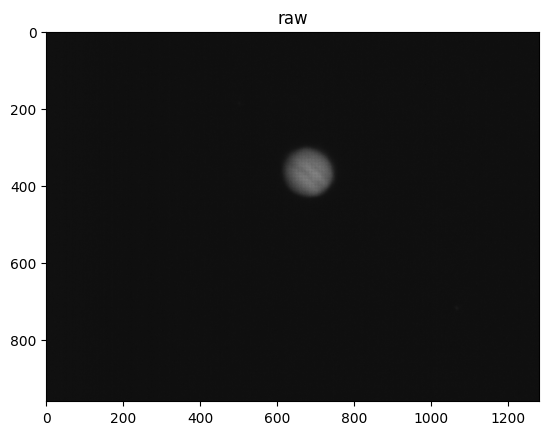

Shape: (960, 1280)
Type: uint16
Max = 12032    Min = 1600
Median = 2256.0    Mean = 2274.8258203125



First calibrated image



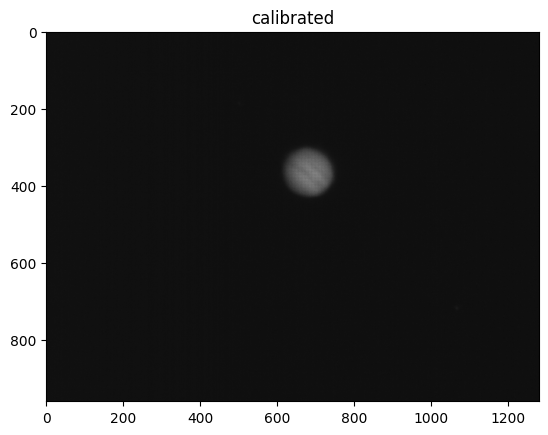

Shape: (960, 1280)
Type: float64
Max = 9767.2    Min = -688.16
Median = -16.96    Mean = -6.589861458333337


First normalized calibrated image



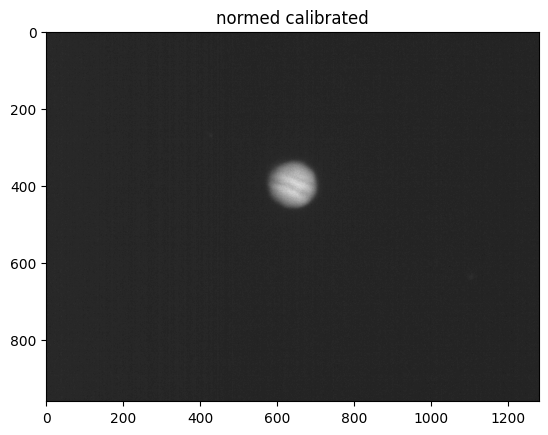

Shape: (960, 1280)
Type: uint8
Max = 79    Min = 4
Median = 15.0    Mean = 15.51944091796875


First normalized calibrated image



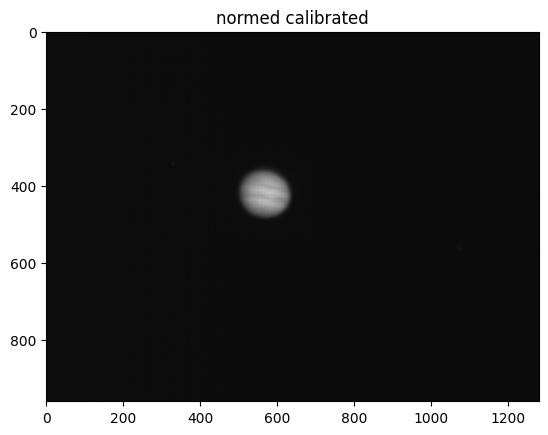

Shape: (960, 1280)
Type: uint8
Max = 223    Min = 5
Median = 15.0    Mean = 16.2383203125


First normalized calibrated image



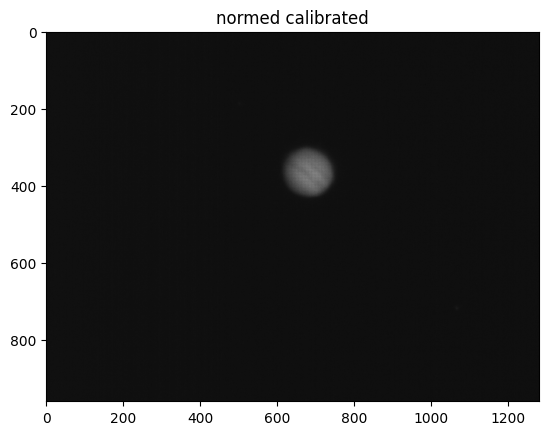

Shape: (960, 1280)
Type: uint8
Max = 214    Min = 2
Median = 15.0    Mean = 15.478453776041667



In [ ]:
# @title Reduce data

# stacked blue-yellow-red from now on
stacks = [blue_stack, yellow_stack, red_stack]


# load master calibration arrays from Lab 2
os.chdir("/content/drive/MyDrive/SPS4110 Senior Lab/Lab 2 - Data Reduction")
mbias = np.genfromtxt("mbias", delimiter=",")
mdark_s = np.genfromtxt("mdark_s", delimiter=",")

# convert mdark to match exposure of Jupiter images
exposure = 20/1000  # in seconds
mdark = mdark_s*exposure

## check calibration images
#print("Calibration images")
#plot_img(mbias, "mbias")
#plot_img(mdark, "mdark")

# calibration loop
stacks_calibrated = []
for stack in stacks:
  # first check
  print("\n\n\nFirst raw image")
  plot_img(stack[0], "raw")

  # calibrate images
  stack_calibrated = []
  for image in stack:
    image = image - mbias - mdark
    stack_calibrated.append(image)

  # check calibration before normalizing
  print("\n\nFirst calibrated image")
  plot_img(stack_calibrated[0], "calibrated")

  stacks_calibrated.append(stack_calibrated)


# normalize images (so cv2 can handle them) according to overall MAX and MIN

MIN = np.min(stacks_calibrated)
MAX = np.max(stacks_calibrated) - MIN

stacks_norm = []
for stack in stacks_calibrated:

  # normalize stack
  stack_norm = []
  for image in stack:
    # normalize to range (0, 255)
    image = (image-MIN)/MAX * 255

    # convert to uint8
    image = image.astype('uint8')

    stack_norm.append(image)

  # last check
  print("\nFirst normalized calibrated image")
  plot_img(stack_norm[0], "normed calibrated")

  #print("\nvmax just above median pixel value to better show background structures of calibrated image")
  #contrast = np.median(stack_calibrated[0])
  #plt.imshow(stack_calibrated[0], cmap='gray', vmin=0.1*contrast, vmax=1.1*contrast)
  #plt.title("background")
  #plt.show()

  stacks_norm.append(stack_norm)


Aligning stack ...
... image 1
... image 2
... image 3
... image 4
... image 5
... image 6
... image 7
... image 8
... image 9
... image 10
... image 11
... image 12
... image 13
... image 14
... image 15
... image 16
... image 17
... image 18
... image 19
... image 20
... image 21
... image 22
... image 23
... image 24
... image 25
... image 26
... image 27
... image 28
... image 29
... image 30
Images in stack aligned :^)



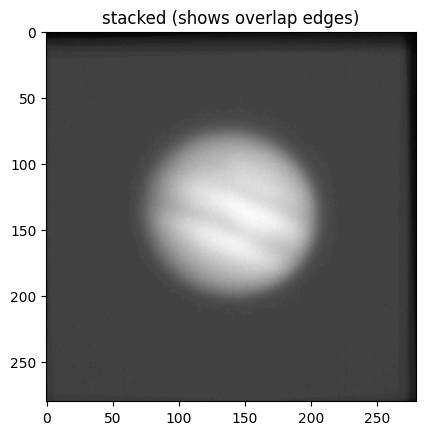

Shape: (280, 280)
Type: uint8
Max = 55    Min = 1
Median = 15.0    Mean = 18.606607142857143




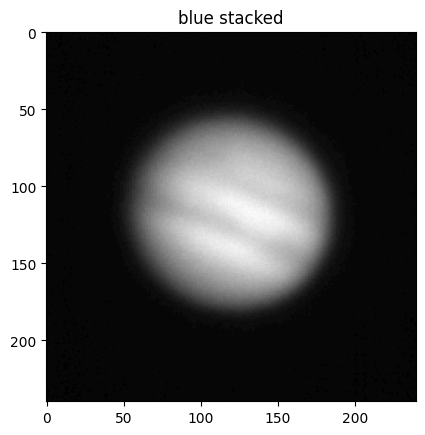

Shape: (240, 240)
Type: uint8
Max = 55    Min = 14
Median = 15.0    Mean = 20.773697916666666


Aligning stack ...
... image 1
... image 2
... image 3
... image 4
... image 5
... image 6
... image 7
... image 8
... image 9
... image 10
... image 11
... image 12
... image 13
... image 14
... image 15
... image 16
... image 17
... image 18
... image 19
... image 20
... image 21
... image 22
... image 23
... image 24
... image 25
... image 26
... image 27
... image 28
... image 29
... image 30
Images in stack aligned :^)



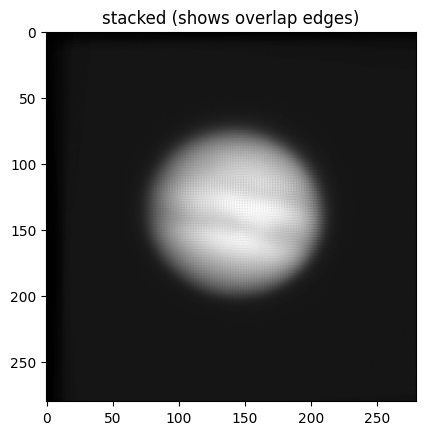

Shape: (280, 280)
Type: uint8
Max = 180    Min = 0
Median = 15.0    Mean = 31.695561224489797




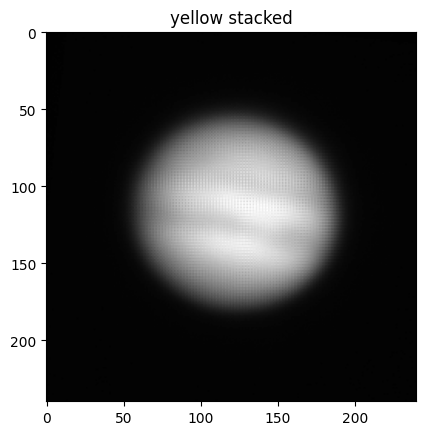

Shape: (240, 240)
Type: uint8
Max = 180    Min = 13
Median = 15.0    Mean = 39.091059027777774


Aligning stack ...
... image 1
... image 2
... image 3
... image 4
... image 5
... image 6
... image 7
... image 8
... image 9
... image 10
... image 11
... image 12
... image 13
... image 14
... image 15
... image 16
... image 17
... image 18
... image 19
... image 20
... image 21
... image 22
... image 23
... image 24
... image 25
... image 26
... image 27
... image 28
... image 29
... image 30
Images in stack aligned :^)



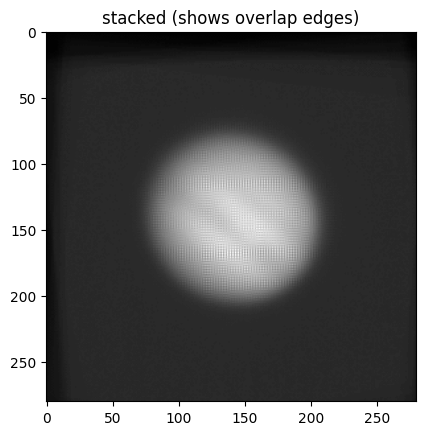

Shape: (280, 280)
Type: uint8
Max = 91    Min = 0
Median = 15.0    Mean = 20.820905612244896




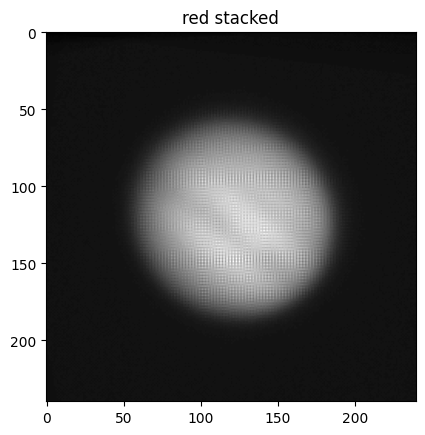

Shape: (240, 240)
Type: uint8
Max = 91    Min = 9
Median = 15.0    Mean = 24.577065972222222



In [ ]:
# @title Align images

# this section doesn't create a new array later, but edits an array elementwise
# create a copy to avoid issues with re-running cells
stacks = copy(stacks_norm)


"""
  Using ECC algorithm to align images because the ORB method didn't work for this kind of image.
    The image is mostly empty space with a small blurry object, can't find many features to align using ORB.
"""

# number of ecc iterations
number_of_iterations = 500

# ecc termination value
termination_eps = 1*10**(-8)

""" transforms im2 to fit to im1 """
# modified (illegally?) from https://github.com/khufkens/align_images/blob/master/align_images.py
def eccAlign(im1, im2):

  # Find size of image1
  sz = im1.shape

  # Define the motion model
  warp_mode = cv.MOTION_EUCLIDEAN

  # Define 2x3 or 3x3 matrices and initialize the matrix to identity
  warp_matrix = np.eye(2, 3, dtype=np.float32)

  # Define termination criteria
  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

  # Run the ECC algorithm. The results are stored in warp_matrix.
  (cc, warp_matrix) = cv.findTransformECC (im1, im2, warp_matrix, warp_mode, criteria)

  # Use warpAffine for Translation, Euclidean and Affine
  im2_aligned = cv.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv.INTER_LINEAR + cv.WARP_INVERSE_MAP);

  return im2_aligned



""" Function to align images of a stack into one
  Input: center = (row coordinate, column coordinate) of Jupiter's *rough* center
  Output: stacked = single combined average image """
def align_stack(stack, center):

  # ECC takes a long time, so crop images first to reduce unnecessary work
  Crow, Ccol = center
  size = 140  # desired radius of image after cropping
  stack_cropped = [image[Crow-size:Crow+size, Ccol-size:Ccol+size] for image in stack]

  # align each subsequent image to the first
  print("\nAligning stack ...")
  stack_aligned = []
  for i in range(len(stack_cropped)):
    print("... image", i+1)
    stack_aligned.append(eccAlign(stack_cropped[0], stack_cropped[i]))
  print("Images in stack aligned :^)")

  # combine the images into one
  stacked = np.mean(stack_aligned, axis=0)  # returns float values
  stacked = stacked.astype('uint8')
  plot_img(stacked, "stacked (shows overlap edges)")

  # trim the fat from the edges
  stacked = stacked[20:-20, 20:-20]

  return stacked


# align blue
blue_center = 400, 640
blue_stacked = align_stack(stacks[0], blue_center)
plot_img(blue_stacked, "blue stacked")

# align yellow
yellow_center = 425, 565
yellow_stacked = align_stack(stacks[1], yellow_center)
plot_img(yellow_stacked, "yellow stacked")

# align red
red_center = 365, 680
red_stacked = align_stack(stacks[2], red_center)
plot_img(red_stacked, "red stacked")

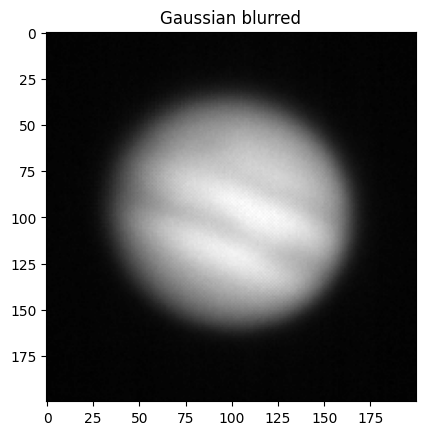

Shape: (200, 200)
Type: uint8
Max = 164    Min = 44
Median = 47.0    Mean = 70.938125




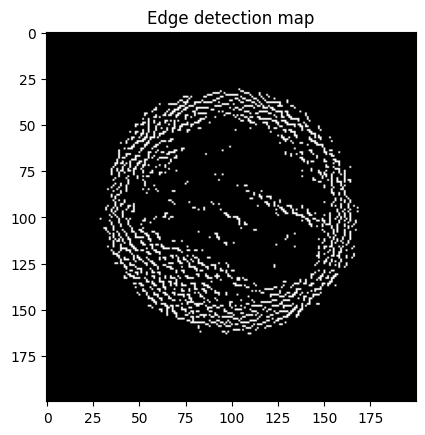

Shape: (200, 200)
Type: uint8
Max = 255    Min = 0
Median = 0.0    Mean = 13.5405



Possible angles: [90.0, 90.0, 103.99999, 90.0, 99.99999, 109.99999, 111.99999]


In [ ]:
# @title Try to find angle -- demonstration purposes only, DON'T RE-RUN THIS

# apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(blue_stacked, (1, 1), 0)
plot_img(blurred, "Gaussian blurred (blue)")

# apply edge detection
low = 24
high = 24
edges = cv.Canny(blurred, low, high)
plot_img(edges, "Edge detection map")


# detect lines using Hough Line transform
length_scale = 1.1
votes = 42  # threshold for hits to count as a line
lines = cv.HoughLines(edges, length_scale, np.pi/180, votes)


# calculate angle of rotation
angles = []
for line in lines:
  rho, theta = line[0]
  if theta != 0:  # disregards vertical lines
    angle = np.degrees(theta)
    angles.append(angle)

print("\n\nPossible angles:", angles)

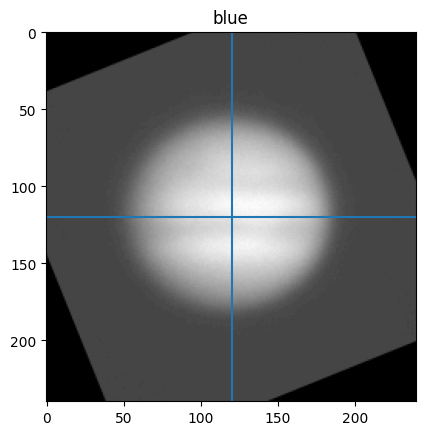

Shape: (240, 240)
Type: uint8
Max = 55    Min = 0
Median = 15.0    Mean = 18.819704861111113




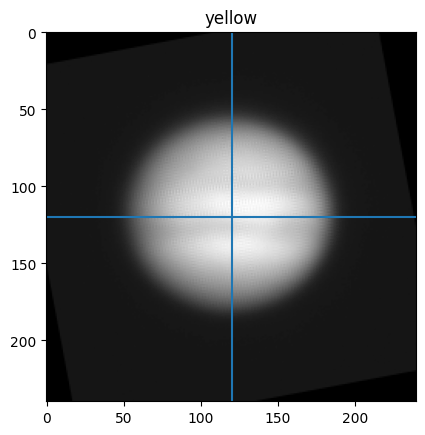

Shape: (240, 240)
Type: uint8
Max = 178    Min = 0
Median = 15.0    Mean = 37.924114583333335




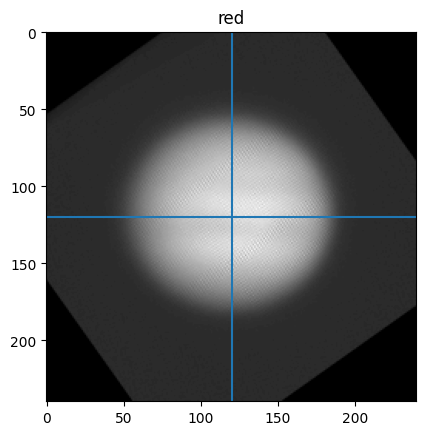

Shape: (240, 240)
Type: uint8
Max = 88    Min = 0
Median = 15.0    Mean = 22.253836805555554



In [ ]:
# @title Rotate images

# function to draw crosshairs; run just before plot_img()
def cross(image):
  plt.axhline(y=image.shape[0]//2)
  plt.axvline(x=image.shape[1]//2)



""" rotate first image """
image = blue_stacked

# choose an angle and wing it
angle = 112 - 90  # perpendicular to make bands horizontal

# compute rotation matrix
center = (image.shape[0]//2, image.shape[1]//2)
rotation_matrix = cv.getRotationMatrix2D(center, angle, 1)

# apply rotation
rotated_image = cv.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# check plot
cross(rotated_image)
plot_img(rotated_image, "blue")



""" have rotated blue to be parallel with x-axis
    instead of finding the angles for the other two filters the same way, just align them to blue """

blue_rot = rotated_image
yellow_source = yellow_stacked
red_source = red_stacked

# align yellow to blue
yellow_rot = eccAlign(blue_rot, yellow_source)
cross(yellow_rot)
plot_img(yellow_rot, "yellow")

# red to blue
red_rot = eccAlign(blue_rot, red_source)
cross(red_rot)
plot_img(red_rot, "red")

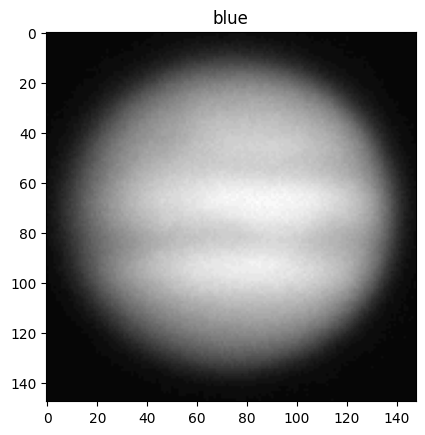

Shape: (148, 148)
Type: uint8
Max = 41    Min = 0
Median = 15.0    Mean = 16.198776479181884




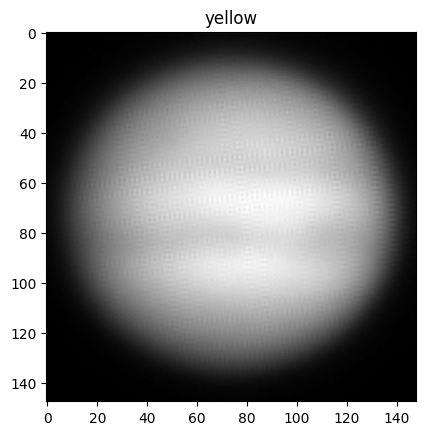

Shape: (148, 148)
Type: uint8
Max = 163    Min = 0
Median = 58.0    Mean = 63.17006026296567




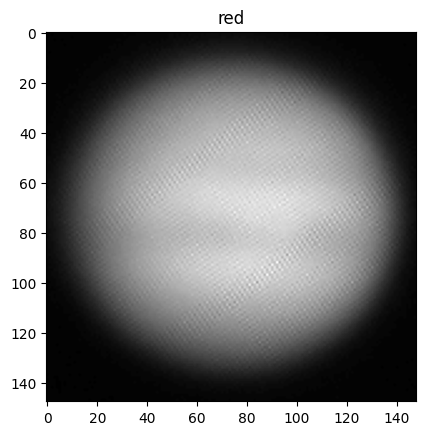

Shape: (148, 148)
Type: uint8
Max = 74    Min = 0
Median = 25.0    Mean = 26.81012600438276



In [ ]:

# @title Crop images

""" all three images have been aligned, meaning they share a common "center" (probably not the actual center)
    crop them all the same way and they should still be aligned """

# function for common crop; cut_size = # pixels from edge to remove from square image
cut_size = 45  # each image should be cut the same way
wiggle = 2  # manual offset to make plot slightly more centered
def crop(image, cut_size=cut_size):
  radius = cut_size
  image_cropped = image[radius:-radius-wiggle, radius:-radius-wiggle]
  return image_cropped

# crop images
blue_crop = crop(blue_rot)
#plot_img(blue_crop, "blue cropped")

yellow_crop = crop(yellow_rot)
#plot_img(yellow_crop, "yellow cropped")

red_crop = crop(red_rot)
#plot_img(red_crop, "red cropped")


# zero floor; each filter has its own background over it that adds a flat value, can safely remove
Jup_blue = blue_crop - np.min(blue_crop)
plot_img(Jup_blue, "blue")

Jup_yellow = yellow_crop - np.min(yellow_crop)
plot_img(Jup_yellow, "yellow")

Jup_red = red_crop - np.min(red_crop)
plot_img(Jup_red, "red")

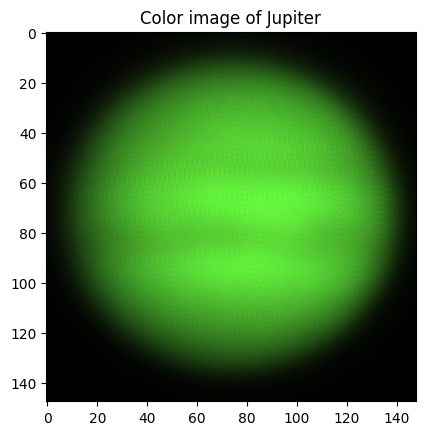

In [ ]:
# @title Color image of Jupiter?? RYB

# matplotlib expects red, green, and blue arrays
# can set green = yellow, or try to approximate green in some way

# color arrays
blue = Jup_blue
yellow = Jup_yellow
red = Jup_red

# normalize color values to (0, 1)
MAX = np.max([blue, yellow, red])
blue_normalized = blue / MAX
yellow_normalized = yellow / MAX
red_normalized = red / MAX

# stack into 3D color array (RYB)
rgb_image = np.stack((red_normalized, yellow_normalized, blue_normalized), axis=-1)

# plot as RYB image
plt.imshow(rgb_image)
plt.title("Color image of Jupiter")
plt.show()

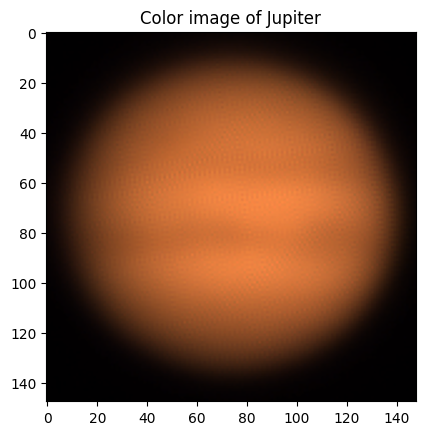

In [ ]:
# @title Color image of Jupiter?? RGB

# matplotlib expects red, green, and blue arrays
# can set green = yellow, or try to approximate green in some way

# color arrays
blue = Jup_blue
yellow = Jup_yellow
red = Jup_red

# approximate green
distro = yellow/2  # split yellow into red and green
red = red + distro
green = yellow - distro

# normalize color values to (0, 1)
MAX = np.max([blue, green, red])
blue_normalized = blue / MAX
green_normalized = green / MAX
red_normalized = red / MAX

# stack into 3D color array (RGB)
rgb_image = np.stack((red_normalized, green_normalized, blue_normalized), axis=-1)

# plot as RGB image
plt.imshow(rgb_image)
plt.title("Color image of Jupiter")
plt.show()

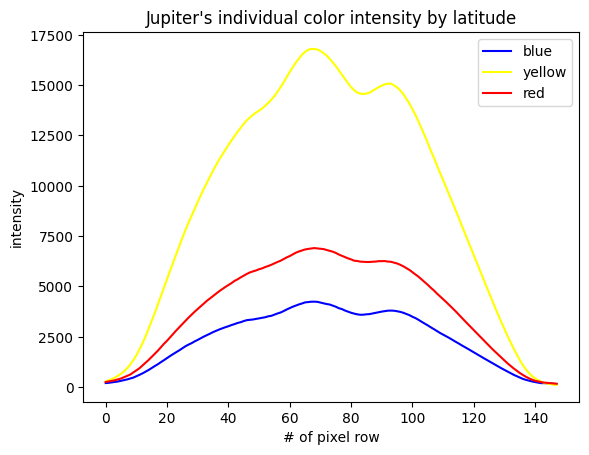

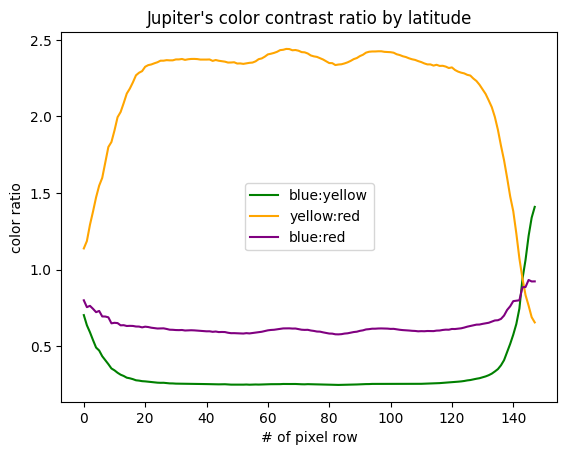

In [ ]:
# @title Color by latitude

# get "latitude" values as distance from center
N = Jup_blue.shape[0]
ls = range(N)
#ls = (np.arange(N) - N/2)

# get sum of pixel values for each row as a 1D array
blues = np.sum(Jup_blue, axis=1)
yellows = np.sum(Jup_yellow, axis=1)
reds = np.sum(Jup_red, axis=1)


# plot raw color by row
plt.plot(ls, blues, color='blue', label='blue')
plt.plot(ls, yellows, color='yellow', label='yellow')
plt.plot(ls, reds, color='red', label='red')
#plt.yscale('log')

# plot labels
plt.title("Jupiter's individual color intensity by latitude")
plt.ylabel("intensity")
plt.xlabel("# of pixel row")
plt.legend()
plt.show()


# plot color ratios
BY = blues/yellows
plt.plot(ls, BY, color='green', label="blue:yellow")
YR = yellows/reds
plt.plot(ls, YR, color='orange', label="yellow:red")
BR = blues/reds
plt.plot(ls, BR, color='purple', label="blue:red")

# plot labels
plt.title("Jupiter's color contrast ratio by latitude")
plt.ylabel("color ratio")
plt.xlabel("# of pixel row")
plt.legend()
plt.show()

In [ ]:
# @title ~~Automatically crop image~~
""" no longer necessary or recommended, as it would probably lead to offsets in each of the three images """

image = blue_rot

# pass image and corners to cut out everything else
def crop(image, corners):
  # unpack corners
  top_left, bot_right = corners
  x1, y1 = top_left
  x2, y2 = bot_right

  # cut out Jupiter
  cropped_image = image[y1:y2, x1:x2]
  return cropped_image

# pass the reference image and get the corners of its bounding box
def auto_crop(image):

  # apply thresholding to simplify the image (creates a binary image)
  low = 16  # pixel value that cuts out the background, choose higher than median
  high = 255  # images are already normalized to (0, 255)
  _, thresh = cv.threshold(image, low, high, cv.THRESH_BINARY)

  # find contours in the binary image
  contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  #plot_img(contours)

  # assume largest contour corresponds to Jupiter's edge
  largest_contour = max(contours, key=cv.contourArea)

  # get the bounding box of the contour
  x1, y1, width, height = cv.boundingRect(largest_contour)

  # pack the corners of the box
  top_left = [x1, y1]
  bot_right = [x1 + width, y1 + height]
  corners = [top_left, bot_right]

  return corners


# get corners of bounding box
corners = auto_crop(image)

cropped_image = crop(image, corners)
plot_img(cropped_image)

In [ ]:
# @title ~~Jupiter regions~~
image = cropped_image

# zero the background
image = image - np.min(image)
#plot_img(image)  # should look the same, but with min = 0
print()

# guess at y boundaries
bounds = [50, 60, 76, 89, 106]
plt.imshow(image, cmap='Blues')
for y in bounds:
  plt.axhline(y=y, color='black', linestyle='--', linewidth=.6)
plt.show()

In [ ]:
# @title ~~Finding the mean of each bin~~

# A function to find the mean brightness values for each of the chosen regions
# (bins) in an image.
# Input arguments:
# (1) bounds: The list of horizontal boundaries determining the size and
# location of each bin. This must be a 1-D array.
# (2) image: the image for which we will be finding the mean values of our bins.
# This must be an array.

# Returns:
# (1) meanList: The list of the mean values found for each bin. This is a 1-D
# array.

def meanBins(bounds, image):
  lowerbound = 0
  meanList = []

  # Finding the means of all but the last bin.
  for upperbound in bounds:
    binArray = image[lowerbound:upperbound, :]
    meanList.append(np.mean(binArray))

    lowerbound = upperbound
    plt.imshow(binArray, cmap='gray')
    plt.show()

  # Finding the mean of the last bin.
  binArray = image[lowerbound:, :]
  meanList.append(np.mean(binArray))
  plt.imshow(binArray, cmap='gray')
  plt.show()

  return meanList